In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hanicier_master_pokemon_dataset_with_corpus_version_path = kagglehub.dataset_download('hanicier/master-pokemon-dataset-with-corpus-version')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 150)
import ast
pd.options.mode.chained_assignment = None  # default='warn'


| Field            | Description                                                     |   |   |   |
|------------------|-----------------------------------------------------------------|---|---|---|
| name             | name of Pokémon                                                 |   |   |   |
| generation       | generation Pokémon comes from                                   |   |   |   |
| status           | if the Pokémon is Legendary or not                              |   |   |   |
| species          | species of Pokémon                                              |   |   |   |
| height           | height of Pokémon in meters                                     |   |   |   |
| weight           | weight of Pokémon in kilograms                                  |   |   |   |
| total_points     | amount total stats add up to                                    |   |   |   |
| HP               | HP stat                                                         |   |   |   |
| attack           | attack stat                                                     |   |   |   |
| defense          | defense stat                                                    |   |   |   |
| sp_attack        | special attack stat                                             |   |   |   |
| sp_defense       | special defense stat                                            |   |   |   |
| speed            | speed stat                                                      |   |   |   |
| egg_types        | Pokémon's egg groups                                            |   |   |   |
| type             | Pokémon's type                                                  |   |   |   |
| against_{type}   | How effective moves of the listed type are against this Pokémon |   |   |   |
| abilities        | The possible abilities this Pokémon can have                    |   |   |   |
| moves            | List of this Pokémon's moves                                    |   |   |   |
| pokedex_number   | The number of the Pokémon as listed in the National Pokédex     |   |   |   |
| sp_defense       | special defense stat                                            |   |   |   |
| speed            | speed stat                                                      |   |   |   |
| egg_types        | Pokémon's egg groups                                            |   |   |   |
| subtype          | Pokémon's secondary typing if any                               |   |   |   |
| egg_subtype      | Pokémon's secondary egg group if any                            |   |   |   |
|


In [ ]:
# below is the old filter/ search function
def filter_lcoms_str(dataframe, columns, setpure, entry1, entry2 = 0, entry3 = 0):
    if columns == 0:
        filter_dex = dataframe[dataframe['egg_types'].astype('str').str.contains(entry1)]
        if entry2 != 0:
            filter_dex2 = filter_dex[filter_dex['egg_types'].astype('str').str.contains(entry2)]
            return filter_dex2
        return filter_dex
    elif columns == 1:
        filter_dex = dataframe[dataframe['type'].astype('str').str.contains(entry1)]
        if setpure == False:
            if entry2 != 0:
                filter_dex2 = filter_dex[filter_dex['type'].astype('str').str.contains(entry2)]
                return filter_dex2
            return filter_dex
        elif setpure == True:
            filter_dex2 = filter_dex[filter_dex['type'].astype('str').str.contains('nan')]
            return filter_dex2
        #return filter_dex
        elif columns == 1:
            filter_dex = dataframe[dataframe['type'].astype('str').str.contains(entry1)]
        if setpure == False:
            if entry2 != 0:
                filter_dex2 = filter_dex[filter_dex['type'].astype('str').str.contains(entry2)]
                return filter_dex2
            return filter_dex
        elif setpure == True:
            filter_dex2 = filter_dex[filter_dex['type'].astype('str').str.contains('nan')]
            return filter_dex2
        #return filter_dex
    elif columns == 2:
        filter_dex = dataframe[dataframe['abilities'].astype('str').str.contains(entry1)]
        if entry2 != 0:
            filter_dex2 = filter_dex[filter_dex['abilities'].astype('str').str.contains(entry2)]
            if entry3 != 0:
                filter_dex3 = filter_dex2[filter_dex2['abilities'].astype('str').str.contains(entry3)]
                return filter_dex3
            return filter_dex2
        return filter_dex
    elif columns == 3:
        filter_dex = dataframe[dataframe['subtype'].astype('str').str.contains(entry1)]
        return filter_dex
    elif columns == 4:
        filter_dex = dataframe[dataframe['egg_subtype'].astype('str').str.contains(entry1)]
        return filter_dex
    if columns == 5:
        filter_dex = dataframe[dataframe['name'].astype('str').str.contains(entry1)]
        return filter_dex
    if columns == 6:
        filter_dex = dataframe[dataframe['abilities'].astype('str').str.contains(entry1)]
        if entry2 != 0:
            filter_dex2 = filter_dex[filter_dex['abilities'].astype('str').str.contains(entry2)]
            if entry3 != 0:
                filter_dex3 = filter_dex2[filter_dex2['abilities'].astype('str').str.contains(entry3)]
                return filter_dex3
            return filter_dex2
        return filter_dex
    else:
        print('I think you typed something in wrong')
        return dataframe


In [ ]:
#SET UP AND FUNCTION DEFINITIONS
filepath = '/kaggle/input/master-pokemon-dataset-with-corpus-version/pokedex.csv'
pokedex = pd.read_csv(filepath)

colors = 'tab20'
searchareas = ['pokedex_number', 'name', 'generation', 'status', 'species', 'height_m', 'weight_kg', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'abilities', 'type', 'egg_types']
all_types = ['Water', 'Normal', 'Psychic', 'Grass', 'Fire', 'Electric', 'Fighting', 'Ice', 'Bug', 'Fairy', 'Ground', 'Rock', 'Poison', 'Ghost', 'Dark', 'Dragon', 'Steel', 'Flying']
all_eggs = ['Field', 'Undiscovered', 'Bug', 'Amorphous', 'Mineral', 'Flying', 'Human-Like', 'Grass', 'Fairy', 'Monster', 'Water 2', 'Water 1', 'Water 3', 'Dragon', 'Ditto'] #, 'nan']

#0 is eggs, 1 is types, 2 is abilities, 3 is pre-filtered types, 4 is pre-filtered egg types, 5 is name, 6 is abilities

def import_pokedex():
    pokedex_file = '/kaggle/input/master-pokemon-dataset-with-corpus-version/pokedex.csv'
    return pd.read_csv(pokedex_file)
pokedex_imp = import_pokedex()

#new search function
def filter_lcoms_srch(dataframe, columns, setpure, entry1, entry2 = 0, entry3 = 0):
    if columns in searchareas:
        filter_dex = dataframe[dataframe[columns].astype('str').str.contains(entry1)]
        if setpure == False:
            if entry2 != 0:
                filter_dex2 = filter_dex[filter_dex[columns].astype('str').str.contains(entry2)]
                if entry3 != 0:
                    filter_dex3 = filter_dex2[filter_dex2[columns].astype('str').str.contains(entry3)]
                    return filter_dex3
                return filter_dex2
            return filter_dex
        elif setpure == True:
            filter_dex2 = filter_dex[filter_dex[columns].astype('str').str.contains('nan')]
            return filter_dex2
    else:
        print('I think you typed something in wrong')
        print('Returning orginal dataframe')
        return dataframe.head(4)

def countin_type():
    num = 0
    for pokes in pokedex_imp:
        if pokes['type'].astype('str').str.contains('Water'):
            num = num + 1
    return num

# unneeded columns and data that is being dropped. Some of it is simply unneeded, some of it has been condensed into a more usable format and thus a new column, and is thus unneeded
to_drop = ['moves', 'Unnamed: 0','against_normal', 'against_fire', 'against_water', 'against_electric','against_grass','against_ice','against_fight','against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy', 'ability_1', 'ability_2', 'ability_hidden', 'egg_type_1', 'egg_type_2', 'egg_type_number', 'abilities_number', 'ability_1_description', 'ability_2_description', 'ability_hidden_description', 'smogon_description','japanese_name', 'bulba_description', 'type_number', 'type_1', 'type_2', 'catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'percentage_male', 'egg_cycles',]
to_drop_alt = ['moves', 'Unnamed: 0','against_normal', 'against_fire', 'against_water', 'against_electric','against_grass','against_ice','against_fight','against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy', 'ability_1', 'ability_2', 'ability_hidden', 'abilities_number', 'egg_type_number', 'ability_1_description', 'ability_2_description', 'ability_hidden_description', 'smogon_description','japanese_name', 'bulba_description', 'type_number', 'type_1', 'type_2', 'catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'percentage_male', 'egg_cycles',]

#I am adding in my new columns below, which combine the pokemon's type, egg type, and ability data into one column each rather than splitting each up into multiple
pokedex_imp
pokedex_imp['abilities'] = pokedex[['ability_1', 'ability_2', 'ability_hidden']].values.tolist()
pokedex_imp['type'] = pokedex[['type_1', 'type_2']].values.tolist()
pokedex_imp_alt = import_pokedex()
pokedex_imp_alt['type'] = pokedex[['type_1', 'type_2']].values.tolist()
pokedex_imp_alt = pokedex_imp_alt.drop(to_drop_alt, axis=1)
pokedex_imp['egg_types'] = pokedex[['egg_type_1', 'egg_type_2']].values.tolist()
pokedex_imp = pokedex_imp.drop(to_drop, axis=1)
pokedex_imp = pd.DataFrame(pokedex_imp)


#final attempt at making individal type and egg sets
def filter_by(types, column, dataframe, setpure):
    if column == 0:
        a = 'egg_types'
        rename_val = False
    elif column == 1:
        a = 'type'
        rename_val = True
    elif column == 3:
        a = 'subtype'
        rename_val = True
    elif column == 4:
        a = 'egg_subtype'
        rename_val = False
    new_dex = filter_lcoms_srch(dataframe, a, setpure, types)
    new_dex[a] = [''.join(map(str, l)) for l in new_dex[a]]
    new_dex = new_dex.replace(types, '', regex=True)
    if column == 3 | column == 4:
        dataframe.drop(types, axis=1)
    if rename_val:
        new_dex = new_dex.rename(columns={a: "subtype"})
    else:
        new_dex = new_dex.rename(columns={a: "egg_subtype"})
    prename = str(dataframe.index.name)
    details = types
    if prename != 'None':
        details = types + ', ' + prename
        print(f'New dataframe, {details}, filtered for {types} and {prename}')
    else:
        print(f'New dataframe, {details}, filtered for {types}')
    return new_dex.rename_axis(details)

mapping_type = {
'Water':       10,
'Normal'    :     20,
'Psychic'    :    30,
'Grass' :      40,
'Fire' :    50,
'Electric'  :    60,
'Fighting' :   70,
'Ice' :  80,
'Bug' : 90,
'Fairy' :       100,
'Ground'     : 110,
'Rock'       : 120,
'Poison': 130,
'Ghost'  : 140,
'Dark'    : 150,
'Dragon'   : 160,
'Steel'   : 170,
'Flying'   : 180,
'nan1' : 190,
'nan2' : 200
}

pokedex_imp

,pokedex_number,name,generation,status,species,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,abilities,type,egg_types
0,1,Bulbasaur,1,Normal,Seed Pokémon,0.7,6.9,318,45,49,49,65,65,45,"[Overgrow, Chlorophyll, nan]","[Grass, Poison]","[Grass, Monster]"
1,2,Ivysaur,1,Normal,Seed Pokémon,1.0,13.0,405,60,62,63,80,80,60,"[Overgrow, Chlorophyll, nan]","[Grass, Poison]","[Grass, Monster]"
2,3,Venusaur,1,Normal,Seed Pokémon,2.0,100.0,525,80,82,83,100,100,80,"[Overgrow, Chlorophyll, Thick Fat]","[Grass, Poison]","[Grass, Monster]"
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2.4,155.5,625,80,100,123,122,120,80,"[Overgrow, Chlorophyll, Thick Fat]","[Grass, Poison]","[Grass, Monster]"
4,4,Charmander,1,Normal,Lizard Pokémon,0.6,8.5,309,39,52,43,60,50,65,"[Blaze, Solar Power, nan]","[Fire, nan]","[Dragon, Monster]"
5,5,Charmeleon,1,Normal,Flame Pokémon,1.1,19.0,405,58,64,58,80,65,80,"[Blaze, Solar Power, nan]","[Fire, nan]","[Dragon, Monster]"
6,6,Charizard,1,Normal,Flame Pokémon,1.7,90.5,534,78,84,78,109,85,100,"[Blaze, Solar Power, Tough Claws]","[Fire, Flying]","[Dragon, Monster]"
7,6,Mega Charizard X,1,Normal,Flame Pokémon,1.7,110.5,634,78,130,111,130,85,100,"[Blaze, Solar Power, Tough Claws]","[Fire, Dragon]","[Dragon, Monster]"
8,6,Mega Charizard Y,1,Normal,Flame Pokémon,1.7,100.5,634,78,104,78,159,115,100,"[Blaze, Solar Power, Tough Claws]","[Fire, Flying]","[Dragon, Monster]"
9,7,Squirtle,1,Normal,Tiny Turtle Pokémon,0.5,9.0,314,44,48,65,50,64,43,"[Torrent, Rain Dish, nan]","[Water, nan]","[Monster, Water 1]"


In [ ]:
#Search/Filter by string/catogorical variable showcase
filter_lcoms_str(pokedex_imp, 5, 0, 'Bulb')

In [ ]:
#search example
filter_lcoms_srch(pokedex_imp, 'weight_kg', 0, '999.9')

,pokedex_number,name,generation,status,species,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,abilities,type,egg_types
923,790,Cosmoem,7,Legendary,Protostar Pokémon,0.1,999.9,400,43,29,131,29,131,37,"[Sturdy, nan, nan]","[Psychic, nan]","[Undiscovered, nan]"
930,797,Celesteela,7,Sub Legendary,Launch Pokémon,9.2,999.9,570,97,101,103,107,101,61,"[Beast Boost, nan, nan]","[Steel, Flying]","[Undiscovered, nan]"


In [ ]:
pokedex_imp['weight_kg'].describe()

count    1044.000000
mean       71.216571
std       132.259911
min         0.100000
25%         9.000000
50%        29.500000
75%        70.500000
max       999.900000
Name: weight_kg, dtype: float64

,Water,Normal,Psychic,Grass,Fire,Electric,Fighting,Ice,Bug,Fairy,Ground,Rock,Poison,Ghost,Dark,Dragon,Steel,Flying
Field,29.0,68.0,17.0,19.0,44.0,24.0,24.0,21.0,NaN,9.0,32.0,8.0,9.0,NaN,36.0,1.0,15.0,5.0
Undiscovered,13.0,10.0,41.0,9.0,10.0,14.0,18.0,10.0,3.0,15.0,8.0,7.0,9.0,9.0,8.0,26.0,16.0,20.0
Bug,5.0,NaN,2.0,6.0,4.0,4.0,2.0,2.0,84.0,2.0,7.0,3.0,14.0,NaN,1.0,2.0,6.0,16.0
Amorphous,6.0,1.0,11.0,11.0,7.0,11.0,2.0,2.0,NaN,8.0,7.0,1.0,13.0,43.0,3.0,3.0,1.0,3.0
Mineral,NaN,3.0,10.0,3.0,2.0,8.0,1.0,10.0,3.0,2.0,12.0,24.0,2.0,15.0,NaN,1.0,25.0,2.0
Flying,5.0,27.0,6.0,3.0,3.0,1.0,3.0,NaN,NaN,3.0,NaN,4.0,3.0,2.0,4.0,4.0,2.0,66.0
Human-Like,NaN,4.0,22.0,2.0,8.0,4.0,31.0,3.0,2.0,7.0,NaN,NaN,4.0,2.0,9.0,NaN,4.0,1.0
Grass,3.0,NaN,2.0,77.0,NaN,NaN,1.0,3.0,2.0,5.0,1.0,NaN,14.0,2.0,3.0,4.0,2.0,4.0
Fairy,5.0,11.0,6.0,11.0,1.0,10.0,2.0,5.0,2.0,32.0,NaN,1.0,2.0,1.0,5.0,NaN,3.0,5.0
Monster,18.0,11.0,7.0,18.0,9.0,6.0,NaN,8.0,NaN,NaN,16.0,19.0,12.0,1.0,2.0,15.0,6.0,3.0


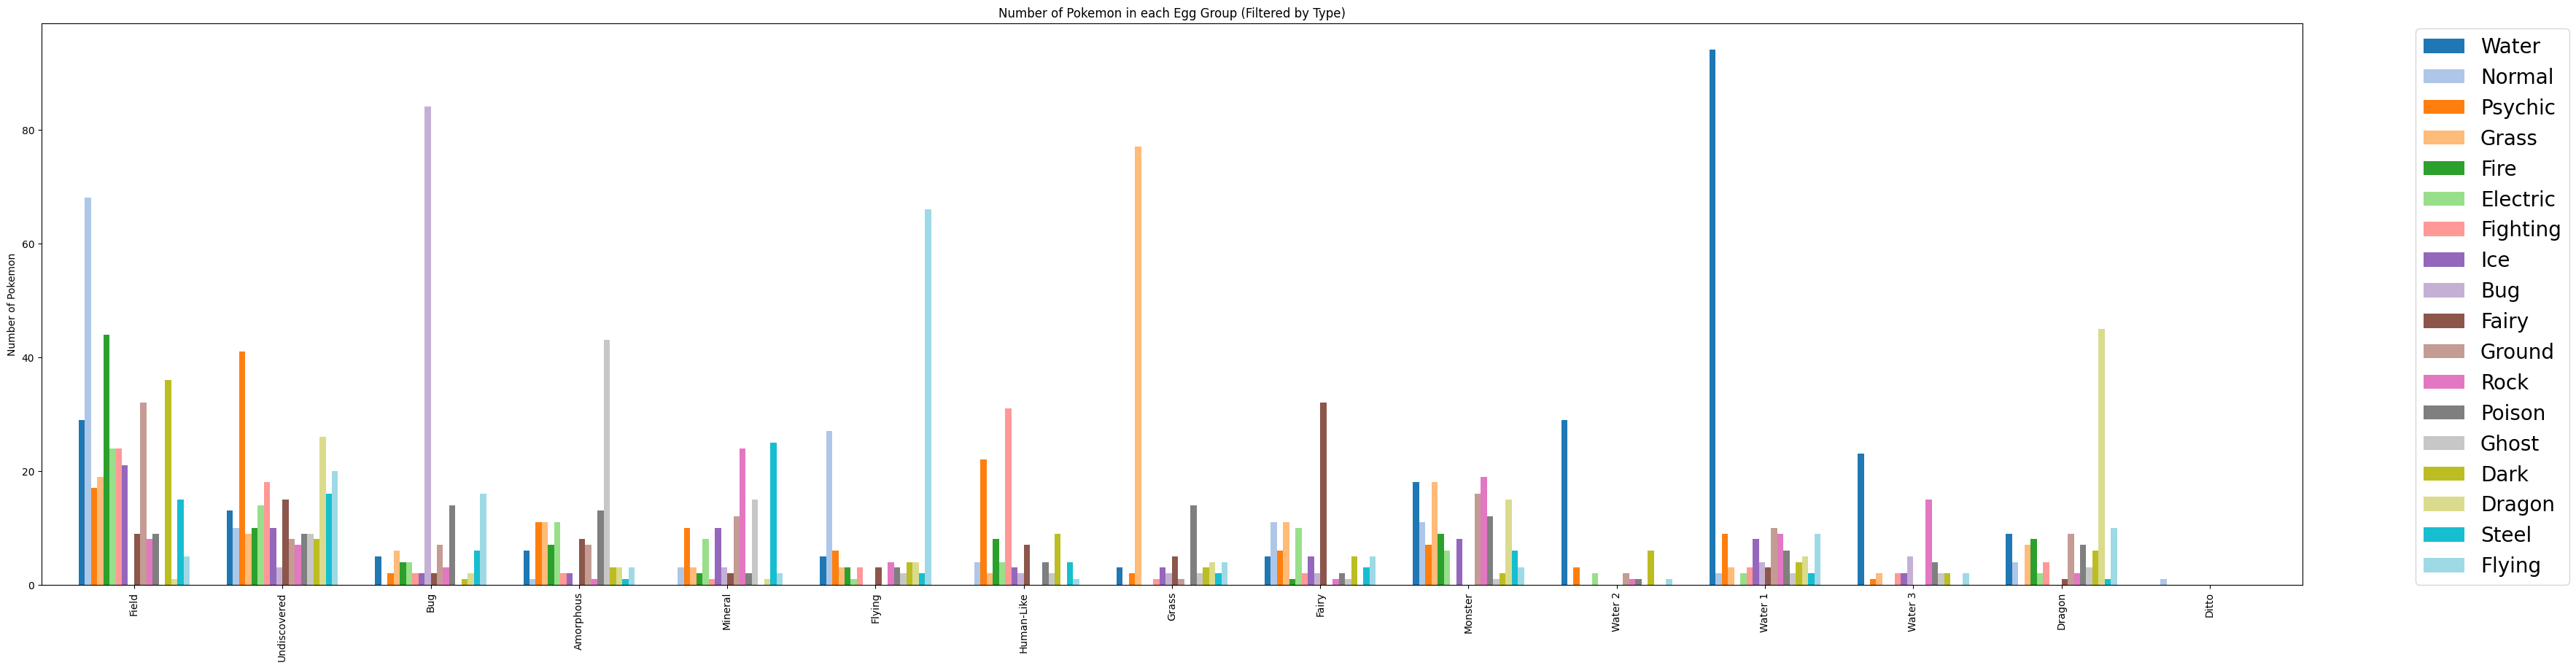

In [ ]:
Water_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Water')
Normal_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Normal')
Psychic_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Psychic')
Grass_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Grass')
Fire_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Fire')
Electric_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Electric')
Fighting_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Fighting')
Ice_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Ice')
Bug_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Bug')
Fairy_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Fairy')
Ground_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Ground')
Rock_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Rock')
Poison_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Poison')
Ghost_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Ghost')
Dark_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Dark')
Dragon_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Dragon')
Steel_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Steel')
Flying_alt = filter_lcoms_str(pokedex_imp_alt, 1, 0, 'Flying')
type_list_alt = [Water_alt, Normal_alt, Psychic_alt, Grass_alt, Fire_alt, Electric_alt, Fighting_alt, Ice_alt, Bug_alt, Fairy_alt, Ground_alt, Rock_alt, Poison_alt, Ghost_alt, Dark_alt, Dragon_alt, Steel_alt, Flying_alt]

wa = type_list_alt[0][['egg_type_1','egg_type_2']].stack().value_counts()
no = type_list_alt[1][['egg_type_1','egg_type_2']].stack().value_counts()
ps = type_list_alt[2][['egg_type_1','egg_type_2']].stack().value_counts()
gr = type_list_alt[3][['egg_type_1','egg_type_2']].stack().value_counts()
fi = type_list_alt[4][['egg_type_1','egg_type_2']].stack().value_counts()
el = type_list_alt[5][['egg_type_1','egg_type_2']].stack().value_counts()
fit = type_list_alt[6][['egg_type_1','egg_type_2']].stack().value_counts()
ic = type_list_alt[7][['egg_type_1','egg_type_2']].stack().value_counts()
bu = type_list_alt[8][['egg_type_1','egg_type_2']].stack().value_counts()
fa = type_list_alt[9][['egg_type_1','egg_type_2']].stack().value_counts()
gro = type_list_alt[10][['egg_type_1','egg_type_2']].stack().value_counts()
ro = type_list_alt[11][['egg_type_1','egg_type_2']].stack().value_counts()
po = type_list_alt[12][['egg_type_1','egg_type_2']].stack().value_counts()
gh = type_list_alt[13][['egg_type_1','egg_type_2']].stack().value_counts()
da = type_list_alt[14][['egg_type_1','egg_type_2']].stack().value_counts()
dr = type_list_alt[15][['egg_type_1','egg_type_2']].stack().value_counts()
st = type_list_alt[16][['egg_type_1','egg_type_2']].stack().value_counts()
fl = type_list_alt[17][['egg_type_1','egg_type_2']].stack().value_counts()

dummy = {'Field' : 1, 'Undiscovered' : 1, 'Bug' : 1, 'Amorphous' : 1, 'Mineral' : 1, 'Flying' : 1, 'Human-Like' : 1, 'Grass' : 1, 'Fairy' : 1, 'Monster' : 1, 'Water 2' : 1, 'Water 1' : 1, 'Water 3' : 1, 'Dragon' : 1, 'Ditto' : 1}
dummy = pd.Series(data=dummy, index=['Field', 'Undiscovered', 'Bug', 'Amorphous', 'Mineral', 'Flying', 'Human-Like', 'Grass', 'Fairy', 'Monster', 'Water 2', 'Water 1', 'Water 3', 'Dragon', 'Ditto'])
dummy = pd.DataFrame(dummy)

wa = pd.DataFrame(wa)
no = pd.DataFrame(no)
ps = pd.DataFrame(ps)
gr = pd.DataFrame(gr)
fi = pd.DataFrame(fi)
el = pd.DataFrame(el)
fit = pd.DataFrame(fit)
ic = pd.DataFrame(ic)
bu = pd.DataFrame(bu)
fa = pd.DataFrame(fa)
gro = pd.DataFrame(gro)
ro = pd.DataFrame(ro)
po = pd.DataFrame(po)
gh = pd.DataFrame(gh)
da = pd.DataFrame(da)
dr = pd.DataFrame(dr)
st = pd.DataFrame(st)
fl = pd.DataFrame(fl)

list_of_frames = [dummy, wa, no, ps, gr, fi, el, fit, ic, bu, fa, gro, ro, po, gh, da, dr, st , fl]

merged = {}
merged_df = pd.DataFrame(merged)
all_types_dummy = ['Dummy', 'Water', 'Normal', 'Psychic', 'Grass', 'Fire', 'Electric', 'Fighting', 'Ice', 'Bug', 'Fairy', 'Ground', 'Rock', 'Poison', 'Ghost', 'Dark', 'Dragon', 'Steel', 'Flying']

i = 0
while i <= 18:
    merged_df[all_types_dummy[i]] = list_of_frames[i]
    i = i + 1
merged_df = merged_df.drop(columns=['Dummy'])
colors = 'tab20'
merged_df.plot.bar(width = 0.75, colormap = colors, figsize = (40,10))
plt.legend(loc=(1.05, 0), prop={'size': 20})
plt.title('Number of Pokemon in each Egg Group (Filtered by Type)')
plt.ylabel('Number of Pokemon')

merged_df

**WHATS THE MOST EFFECTIVE MOVE TYPE?**

,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0.00,68.0,13.0,16.0,96.0,6.0,1.0,68.0,72.0,160.0,NaN,74.0,1.0,NaN,126.0,62.0,NaN,1.0,1.0
0.25,7.0,26.0,10.0,7.0,107.0,12.0,54.0,22.0,6.0,14.0,9.0,56.0,10.0,NaN,NaN,7.0,11.0,3.0
0.50,128.0,294.0,275.0,197.0,337.0,280.0,243.0,206.0,120.0,164.0,154.0,333.0,165.0,62.0,64.0,171.0,315.0,197.0
1.00,842.0,444.0,559.0,523.0,397.0,454.0,414.0,612.0,494.0,624.0,678.0,469.0,591.0,686.0,849.0,708.0,580.0,667.0
1.25,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.50,NaN,2.0,NaN,2.0,NaN,NaN,3.0,1.0,5.0,NaN,NaN,1.0,NaN,3.0,NaN,2.0,1.0,NaN
2.00,NaN,241.0,170.0,212.0,168.0,261.0,241.0,127.0,236.0,230.0,128.0,174.0,249.0,164.0,70.0,153.0,132.0,167.0
3.00,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4.00,NaN,23.0,14.0,8.0,28.0,33.0,22.0,5.0,24.0,13.0,2.0,11.0,30.0,3.0,NaN,3.0,5.0,10.0
125.00,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


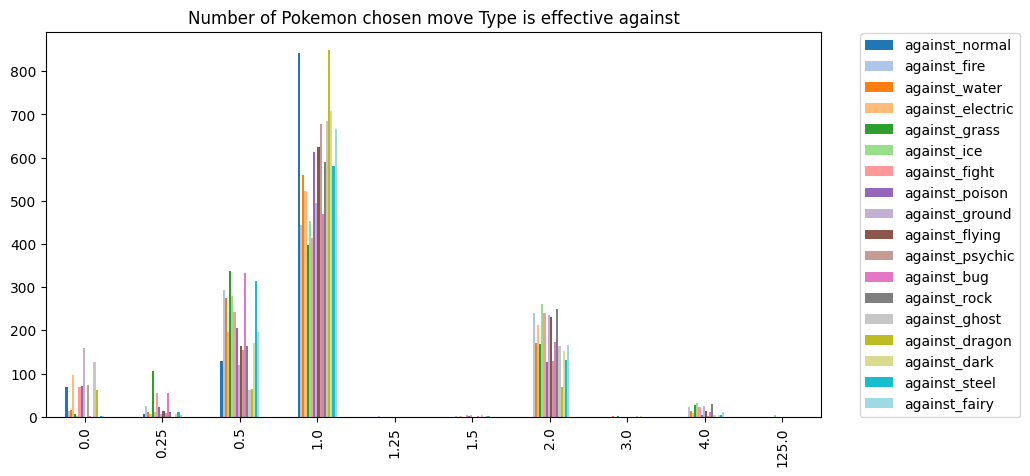

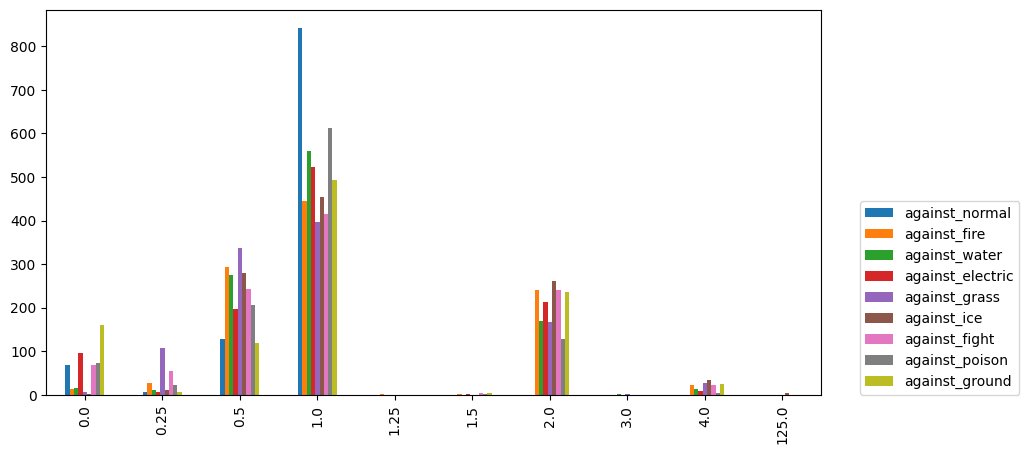

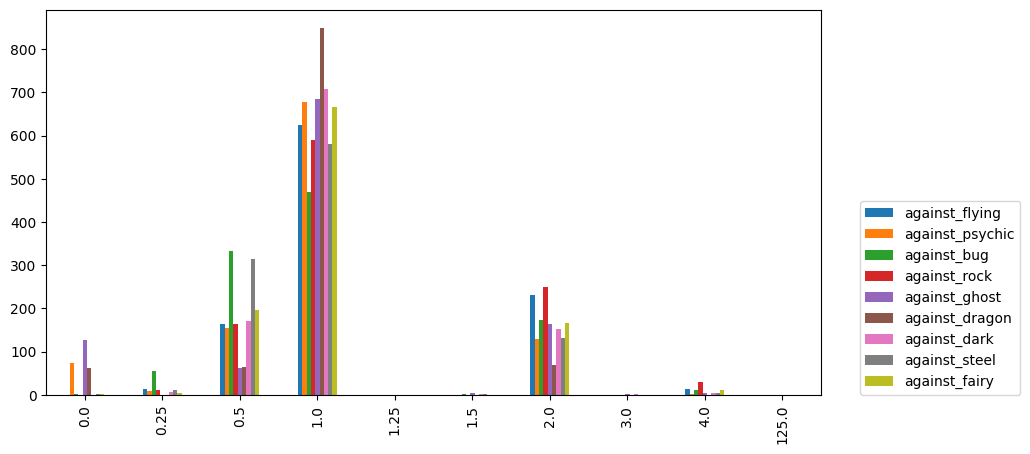

In [ ]:
#type effectiveness table and charts

pokedex1 = import_pokedex()
effectiveness_list = ['against_normal', 'against_fire', 'against_water','against_electric','against_grass','against_ice','against_fight','against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy']

ef1 = ['against_normal', 'against_fire', 'against_water','against_electric','against_grass','against_ice','against_fight','against_poison','against_ground']
ef2 = ['against_flying','against_psychic','against_bug','against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy']


effect_table = {}

for effs in effectiveness_list:
    effect_table[effs] = pokedex1[effs].value_counts()

effect_table = pd.DataFrame(effect_table)

effect_table.plot(kind='bar', figsize=(10,5), colormap = colors)
plt.legend(loc=(1.05, 0), prop={'size': 10})
plt.title('Number of Pokemon chosen move Type is effective against')

effect_table[ef1].plot(kind='bar', figsize=(10,5))
plt.legend(loc=(1.05, 0), prop={'size': 10})

effect_table[ef2].plot(kind='bar', figsize=(10,5))
plt.legend(loc=(1.05, 0), prop={'size': 10})
effect_table

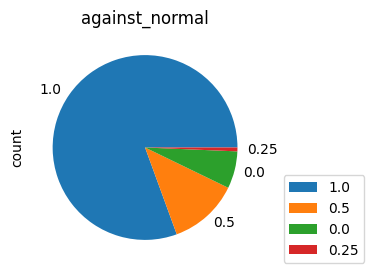

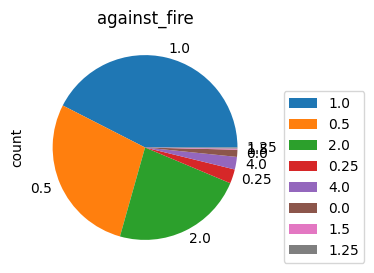

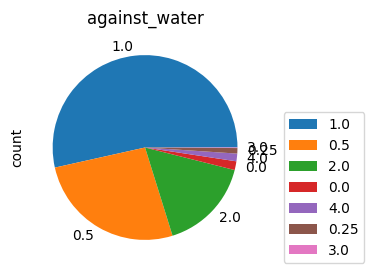

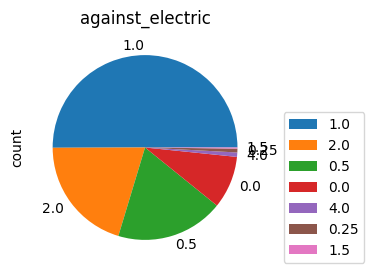

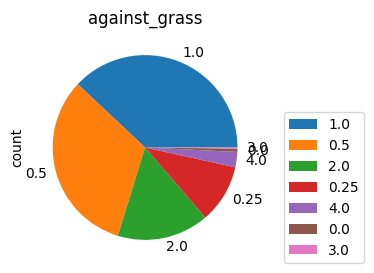

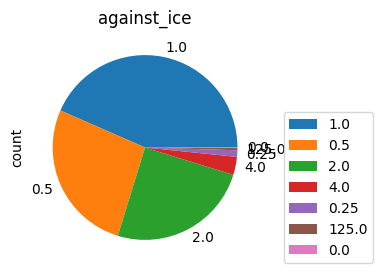

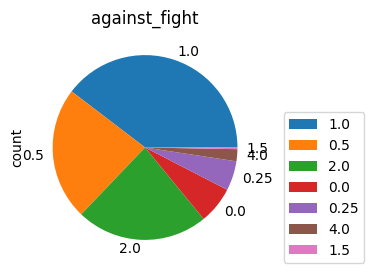

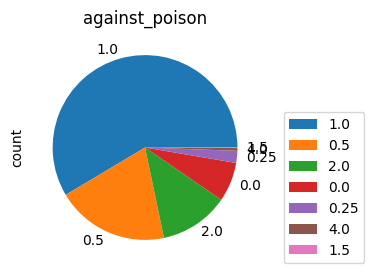

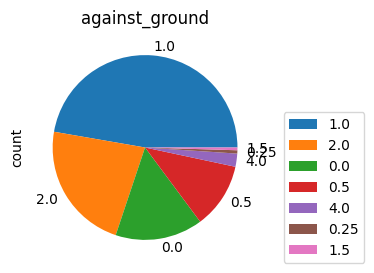

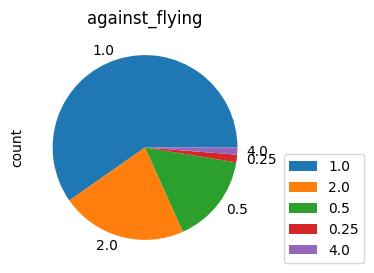

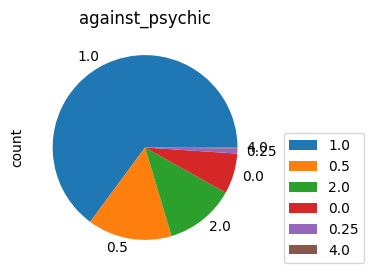

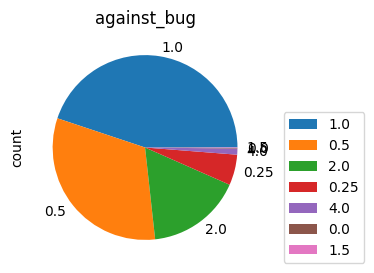

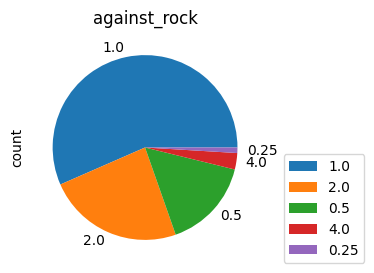

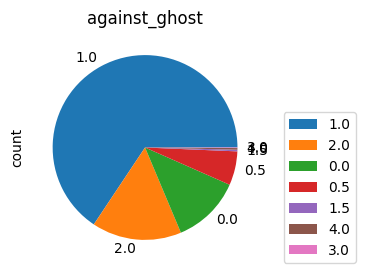

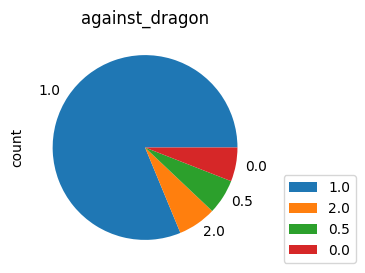

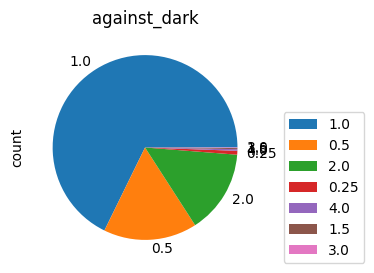

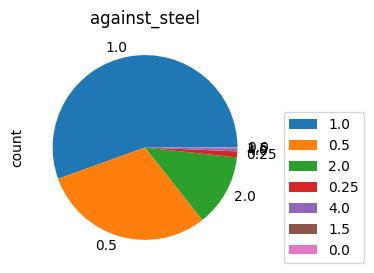

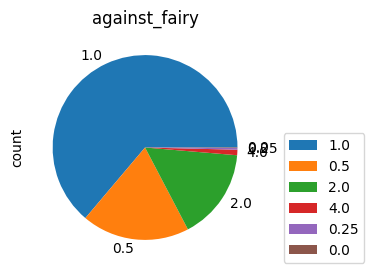

In [ ]:
#pie charts to better show each types overall effectiveness against all pokemon
for effs in effectiveness_list:
    pokedex1[effs].value_counts().plot(kind='pie', figsize=(3,3))
    plt.legend(loc=(1.1, 0), prop={'size': 10})
    plt.title(effs)
    plt.show()

**WHATS THE MOST COMMON EGG GROUP? HOW MANY POKEMON PER EGG GROUP WERE ADDED IN EACH GEN?**

New dataframe, Field, filtered for Field
New dataframe, Undiscovered, filtered for Undiscovered
New dataframe, Bug, filtered for Bug
New dataframe, Amorphous, filtered for Amorphous
New dataframe, Mineral, filtered for Mineral
New dataframe, Flying, filtered for Flying
New dataframe, Human-Like, filtered for Human-Like
New dataframe, Grass, filtered for Grass
New dataframe, Fairy, filtered for Fairy
New dataframe, Monster, filtered for Monster
New dataframe, Water 2, filtered for Water 2
New dataframe, Water 1, filtered for Water 1
New dataframe, Water 3, filtered for Water 3
New dataframe, Dragon, filtered for Dragon
New dataframe, Ditto, filtered for Ditto
New dataframe, Water 1, filtered for Water 1
New dataframe, Water 2, filtered for Water 2
New dataframe, Water 3, filtered for Water 3
New dataframe, Human-Like, filtered for Human-Like
New dataframe, Dragon, filtered for Dragon


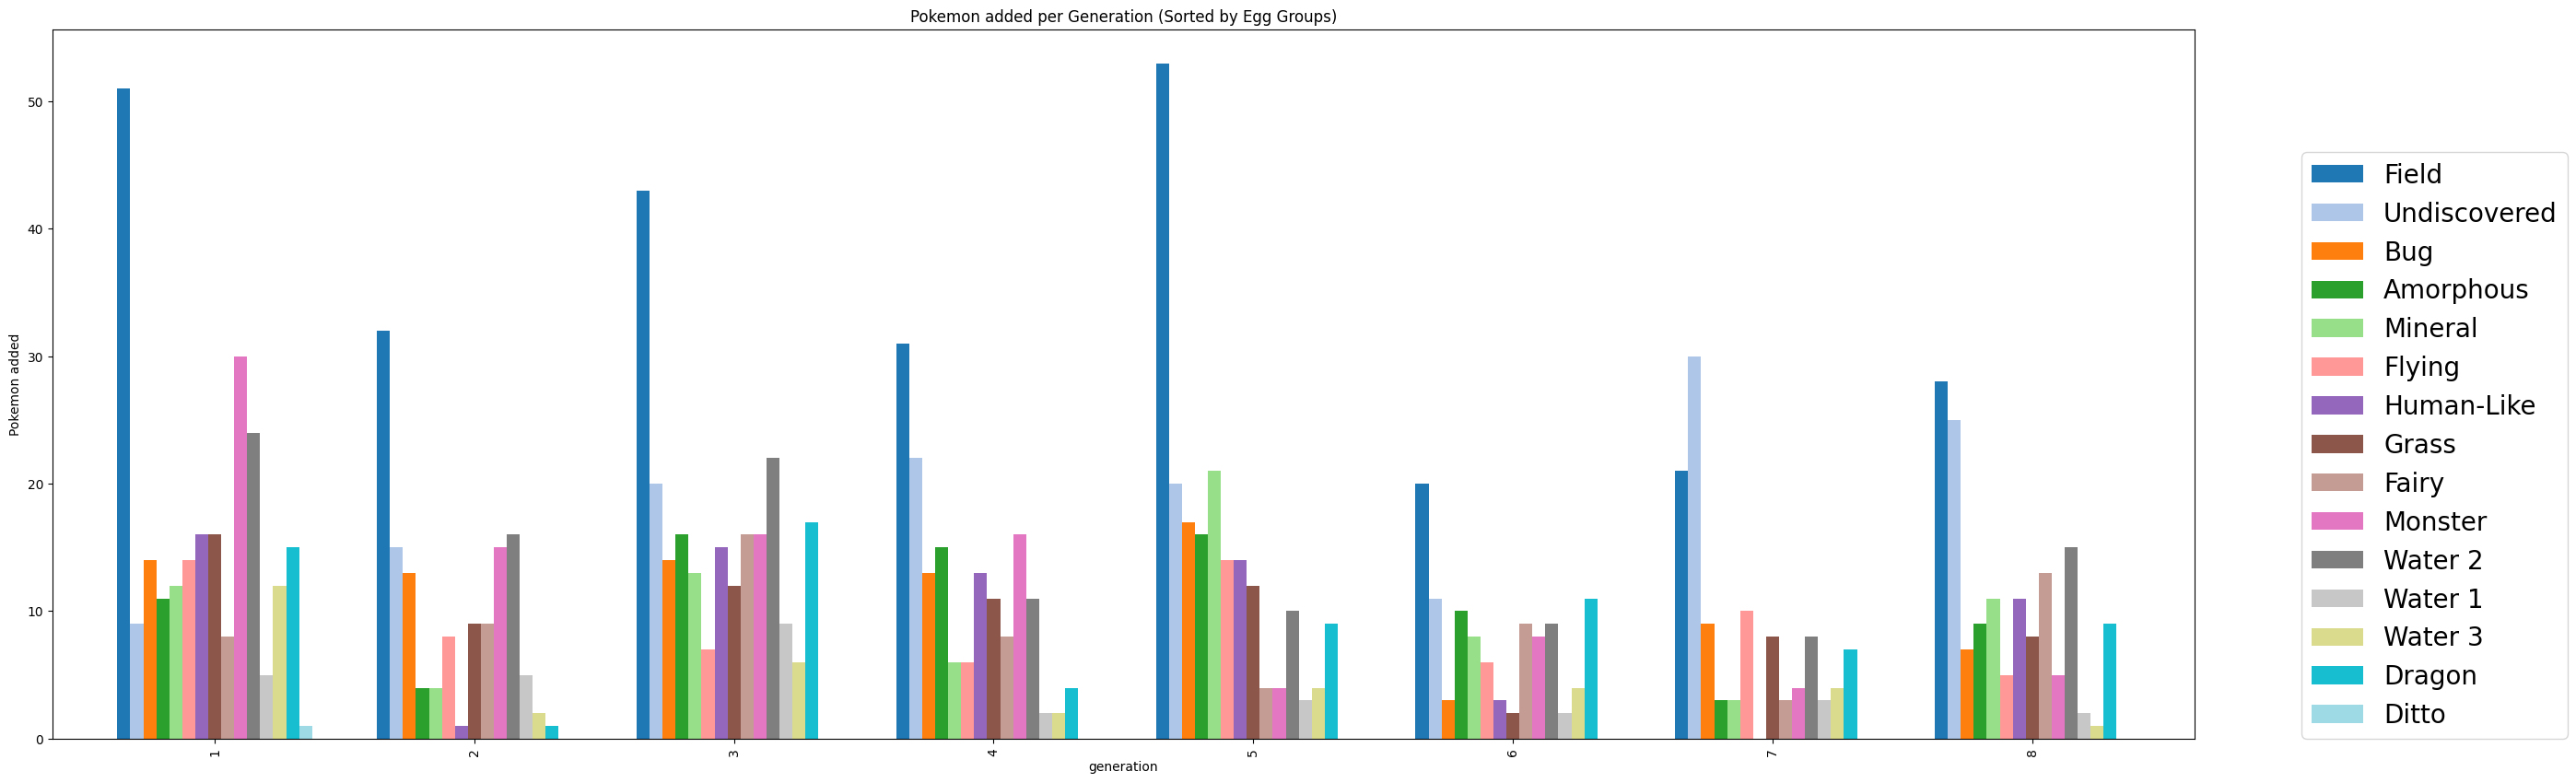

            Field  Undiscovered  Bug  Amorphous  Mineral  Flying  Human-Like  \
generation                                                                     
1              51             9   14         11       12      14        16.0   
2              32            15   13          4        4       8         1.0   
3              43            20   14         16       13       7        15.0   
4              31            22   13         15        6       6        13.0   
5              53            20   17         16       21      14        14.0   
6              20            11    3         10        8       6         3.0   
7              21            30    9          3        3      10         NaN   
8              28            25    7          9       11       5        11.0   

            Grass  Fairy  Monster  Water 2  Water 1  Water 3  Dragon  Ditto  
generation                                                                   
1              16      8       30       24 

,Field,Undiscovered,Bug,Amorphous,Mineral,Flying,Human-Like,Grass,Fairy,Monster,Water 2,Water 1,Water 3,Dragon,Ditto
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,7.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,1.0
mean,34.875000,19.000000,11.250000,10.50000,9.750000,8.750000,10.428571,9.750000,8.75000,12.250000,14.37500,3.875000,4.375000,9.125000,1.0
std,12.755251,7.050836,4.559135,5.09902,5.849298,3.575712,5.996030,4.097037,4.26782,8.924285,6.02228,2.416461,3.461523,5.303301,NaN
min,20.000000,9.000000,3.000000,3.00000,3.000000,5.000000,1.000000,2.000000,3.00000,4.000000,8.00000,2.000000,1.000000,1.000000,1.0
25%,26.250000,14.000000,8.500000,7.75000,5.500000,6.000000,7.000000,8.000000,7.00000,4.750000,9.75000,2.000000,2.000000,6.250000,1.0
50%,31.500000,20.000000,13.000000,10.50000,9.500000,7.500000,13.000000,10.000000,8.50000,11.500000,13.00000,3.000000,4.000000,9.000000,1.0
75%,45.000000,22.750000,14.000000,15.25000,12.250000,11.000000,14.500000,12.000000,10.00000,16.000000,17.50000,5.000000,4.500000,12.000000,1.0
max,53.000000,30.000000,17.000000,16.00000,21.000000,14.000000,16.000000,16.000000,16.00000,30.000000,24.00000,9.000000,12.000000,17.000000,1.0


In [ ]:
#EGGS
for eggs in all_eggs:
    vars()[eggs] = filter_by(eggs, 0, pokedex_imp, 0)
Water_1 = filter_by('Water 1', 0, pokedex_imp, 0)
Water_2 = filter_by('Water 2', 0, pokedex_imp, 0)
Water_3 = filter_by('Water 3', 0, pokedex_imp, 0)
Human_Like = filter_by('Human-Like', 0, pokedex_imp, 0)
DragonEgg = filter_by('Dragon', 0, pokedex_imp, 0)
egg_list = [Field, Undiscovered, Bug, Amorphous, Mineral, Flying, Human_Like, Grass, Fairy, Monster, Water_1, Water_2, Water_3, DragonEgg, Ditto] #, nan]

df = {}
egg = 0
while egg <= 14:
    df[f'{all_eggs[egg]}'] = egg_list[egg]['generation'].value_counts()
    egg = egg + 1
df = pd.DataFrame(df)

df.plot.bar(width = 0.75, colormap = colors, figsize = (30,10))
plt.legend(loc=(1.05, 0), prop={'size': 20})
plt.ylabel('Pokemon added')
plt.title('Pokemon added per Generation (Sorted by Egg Groups)')

plt.show()
print(df)
df.describe()

In [ ]:
#MONOEGG
monoegg_dex = pokedex_imp[pokedex_imp['egg_types'].astype('str').str.contains('nan')]
monoegg_dex


,pokedex_number,name,generation,status,species,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,abilities,type,egg_types
13,10,Caterpie,1,Normal,Worm Pokémon,0.3,2.9,195,45,30,35,20,20,45,"[Shield Dust, Run Away, nan]","[Bug, nan]","[Bug, nan]"
14,11,Metapod,1,Normal,Cocoon Pokémon,0.7,9.9,205,50,20,55,25,25,30,"[Shed Skin, nan, nan]","[Bug, nan]","[Bug, nan]"
15,12,Butterfree,1,Normal,Butterfly Pokémon,1.1,32.0,395,60,45,50,90,80,70,"[Compound Eyes, Tinted Lens, nan]","[Bug, Flying]","[Bug, nan]"
16,13,Weedle,1,Normal,Hairy Bug Pokémon,0.3,3.2,195,40,35,30,20,20,50,"[Shield Dust, Run Away, nan]","[Bug, Poison]","[Bug, nan]"
17,14,Kakuna,1,Normal,Cocoon Pokémon,0.6,10.0,205,45,25,50,25,25,35,"[Shed Skin, nan, nan]","[Bug, Poison]","[Bug, nan]"
18,15,Beedrill,1,Normal,Poison Bee Pokémon,1.0,29.5,395,65,90,40,45,80,75,"[Swarm, Sniper, Adaptability]","[Bug, Poison]","[Bug, nan]"
19,15,Mega Beedrill,1,Normal,Poison Bee Pokémon,1.4,40.5,495,65,150,40,15,80,145,"[Swarm, Sniper, Adaptability]","[Bug, Poison]","[Bug, nan]"
20,16,Pidgey,1,Normal,Tiny Bird Pokémon,0.3,1.8,251,40,45,40,35,35,56,"[Keen Eye, Tangled Feet, Big Pecks]","[Normal, Flying]","[Flying, nan]"
21,17,Pidgeotto,1,Normal,Bird Pokémon,1.1,30.0,349,63,60,55,50,50,71,"[Keen Eye, Tangled Feet, Big Pecks]","[Normal, Flying]","[Flying, nan]"
22,18,Pidgeot,1,Normal,Bird Pokémon,1.5,39.5,479,83,80,75,70,70,101,"[Keen Eye, Tangled Feet, Big Pecks]","[Normal, Flying]","[Flying, nan]"


In [ ]:
#MONOTYPE
monotype_dex = pokedex_imp[pokedex_imp['type'].astype('str').str.contains('nan')]
monotype_dex


,pokedex_number,name,generation,status,species,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,abilities,type,egg_types
4,4,Charmander,1,Normal,Lizard Pokémon,0.6,8.5,309,39,52,43,60,50,65,"[Blaze, Solar Power, nan]","[Fire, nan]","[Dragon, Monster]"
5,5,Charmeleon,1,Normal,Flame Pokémon,1.1,19.0,405,58,64,58,80,65,80,"[Blaze, Solar Power, nan]","[Fire, nan]","[Dragon, Monster]"
9,7,Squirtle,1,Normal,Tiny Turtle Pokémon,0.5,9.0,314,44,48,65,50,64,43,"[Torrent, Rain Dish, nan]","[Water, nan]","[Monster, Water 1]"
10,8,Wartortle,1,Normal,Turtle Pokémon,1.0,22.5,405,59,63,80,65,80,58,"[Torrent, Rain Dish, nan]","[Water, nan]","[Monster, Water 1]"
11,9,Blastoise,1,Normal,Shellfish Pokémon,1.6,85.5,530,79,83,100,85,105,78,"[Torrent, Rain Dish, Mega Launcher]","[Water, nan]","[Monster, Water 1]"
12,9,Mega Blastoise,1,Normal,Shellfish Pokémon,1.6,101.1,630,79,103,120,135,115,78,"[Torrent, Rain Dish, Mega Launcher]","[Water, nan]","[Monster, Water 1]"
13,10,Caterpie,1,Normal,Worm Pokémon,0.3,2.9,195,45,30,35,20,20,45,"[Shield Dust, Run Away, nan]","[Bug, nan]","[Bug, nan]"
14,11,Metapod,1,Normal,Cocoon Pokémon,0.7,9.9,205,50,20,55,25,25,30,"[Shed Skin, nan, nan]","[Bug, nan]","[Bug, nan]"
24,19,Rattata,1,Normal,Mouse Pokémon,0.3,3.5,253,30,56,35,25,35,72,"[Thick Fat, Run Away, Guts]","[Normal, nan]","[Field, nan]"
26,20,Raticate,1,Normal,Mouse Pokémon,0.7,18.5,413,55,81,60,50,70,97,"[Thick Fat, Run Away, Guts]","[Normal, nan]","[Field, nan]"


**HOW COMMON IS EACH MONOTYPE? WHOSE THE HEAVIEST AND LONGEST MONOTYPE POKEMON?**

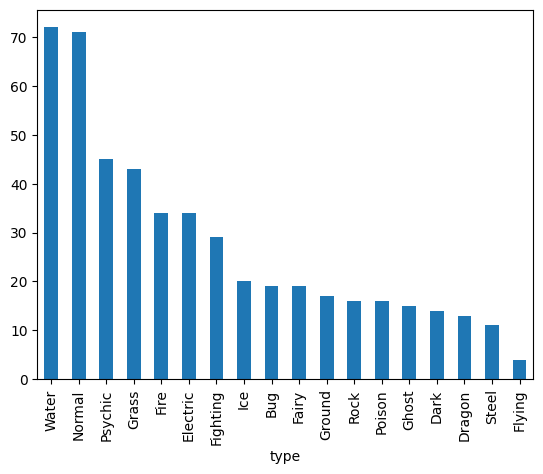

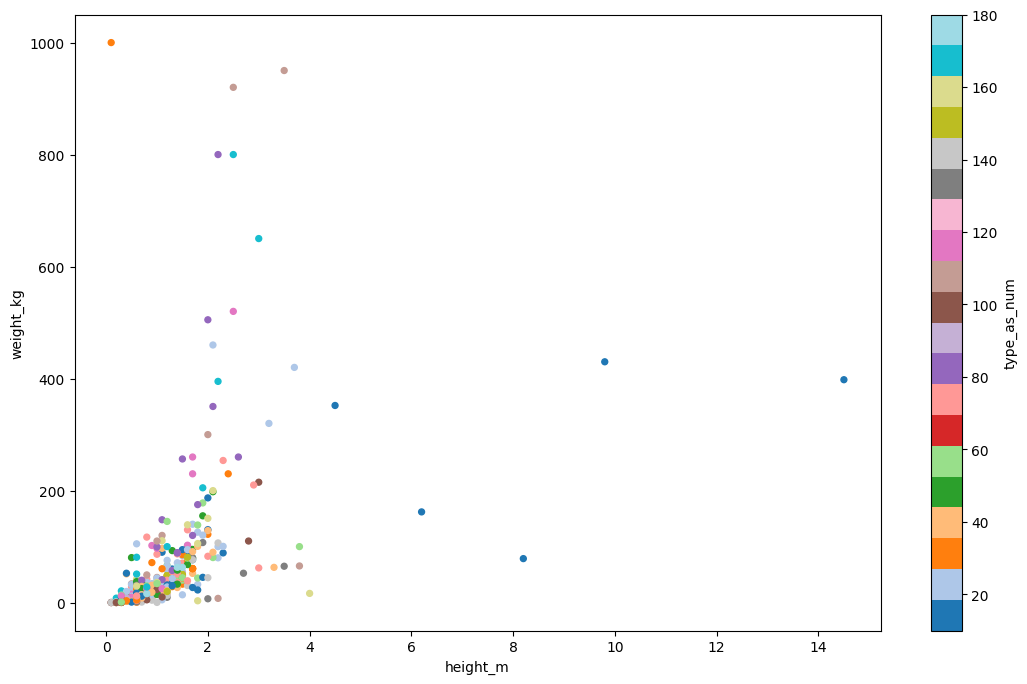

In [ ]:
#monotype populations and weight and height chart
monotype_dex['type'] = [''.join(map(str, l)) for l in monotype_dex['type']]
monotype_dex
mono = monotype_dex.replace('nan', '', regex=True)
mono

mono['type'].value_counts().plot(kind='bar')

mono['type'].value_counts()

mono['type_as_num']  = mono.type.map(mapping_type)
mono.head()
mono.plot(kind='scatter', x='height_m', y='weight_kg', figsize=(13,8), s=18, c='type_as_num', colormap='tab20');

**HOW MANY POKEMON OF EACH TYPE WERE ADDED PER GEN?**

New dataframe, Water, filtered for Water
New dataframe, Normal, filtered for Normal
New dataframe, Psychic, filtered for Psychic
New dataframe, Grass, filtered for Grass
New dataframe, Fire, filtered for Fire
New dataframe, Electric, filtered for Electric
New dataframe, Fighting, filtered for Fighting
New dataframe, Ice, filtered for Ice
New dataframe, Bug, filtered for Bug
New dataframe, Fairy, filtered for Fairy
New dataframe, Ground, filtered for Ground
New dataframe, Rock, filtered for Rock
New dataframe, Poison, filtered for Poison
New dataframe, Ghost, filtered for Ghost
New dataframe, Dark, filtered for Dark
New dataframe, Dragon, filtered for Dragon
New dataframe, Steel, filtered for Steel
New dataframe, Flying, filtered for Flying


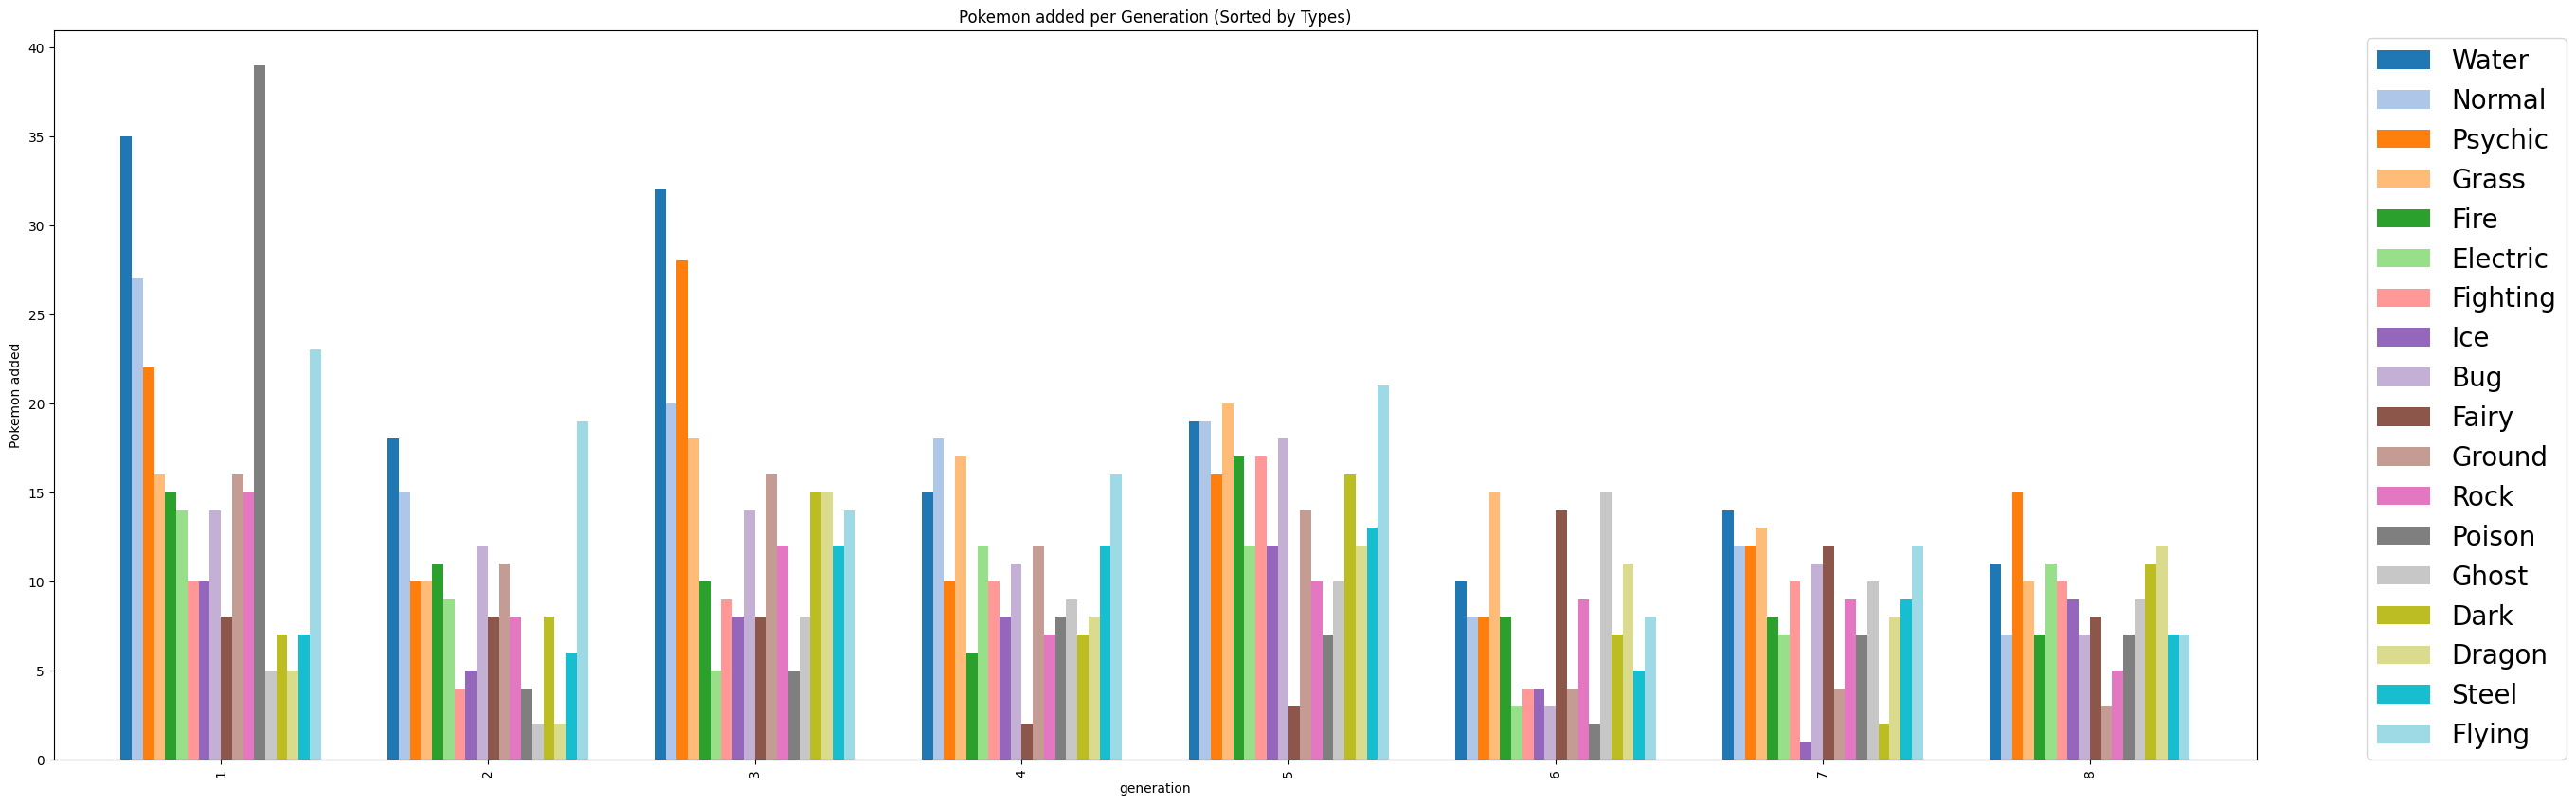

            Water  Normal  Psychic  Grass  Fire  Electric  Fighting  Ice  Bug  \
generation                                                                      
1              35      27       22     16    15        14        10   10   14   
2              18      15       10     10    11         9         4    5   12   
3              32      20       28     18    10         5         9    8   14   
4              15      18       10     17     6        12        10    8   11   
5              19      19       16     20    17        12        17   12   18   
6              10       8        8     15     8         3         4    4    3   
7              14      12       12     13     8         7        10    1   11   
8              11       7       15     10     7        11        10    9    7   

            Fairy  Ground  Rock  Poison  Ghost  Dark  Dragon  Steel  Flying  
generation                                                                   
1               8      16    15  

,Water,Normal,Psychic,Grass,Fire,Electric,Fighting,Ice,Bug,Fairy,Ground,Rock,Poison,Ghost,Dark,Dragon,Steel,Flying
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0000
mean,19.250000,15.750000,15.125000,14.875000,10.250000,9.125000,9.250000,7.125000,11.250000,7.875000,10.000000,9.375000,9.875000,8.500000,9.125000,9.125000,8.875000,15.0000
std,9.346504,6.670832,6.833479,3.642507,3.918819,3.833592,4.097037,3.563205,4.590363,4.015595,5.529144,3.067689,11.933596,3.817254,4.642582,4.223658,3.090885,5.8554
min,10.000000,7.000000,8.000000,10.000000,6.000000,3.000000,4.000000,1.000000,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000,5.000000,7.0000
25%,13.250000,11.000000,10.000000,12.250000,7.750000,6.500000,7.750000,4.750000,10.000000,6.750000,4.000000,7.750000,4.750000,7.250000,7.000000,7.250000,6.750000,11.0000
50%,16.500000,16.500000,13.500000,15.500000,9.000000,10.000000,10.000000,8.000000,11.500000,8.000000,11.500000,9.000000,7.000000,9.000000,7.500000,9.500000,8.000000,15.0000
75%,22.250000,19.250000,17.500000,17.250000,12.000000,12.000000,10.000000,9.250000,14.000000,9.000000,14.500000,10.500000,7.250000,10.000000,12.000000,12.000000,12.000000,19.5000
max,35.000000,27.000000,28.000000,20.000000,17.000000,14.000000,17.000000,12.000000,18.000000,14.000000,16.000000,15.000000,39.000000,15.000000,16.000000,15.000000,13.000000,23.0000


In [ ]:
#TYPES
for types in all_types:
    vars()[types] = filter_by(types, 1, pokedex_imp, 0)
type_list = [Water, Normal, Psychic, Grass, Fire, Electric, Fighting, Ice, Bug, Fairy, Ground, Rock, Poison, Ghost, Dark, Dragon, Steel, Flying]

df = {}
ty = 0
while ty <= 17:
    df[f'{all_types[ty]}'] = type_list[ty]['generation'].value_counts()
    ty = ty + 1
df = pd.DataFrame(df)

df.plot.bar(width = 0.75, colormap = colors, figsize = (30,10))
plt.legend(loc=(1.05, 0), prop={'size': 20})
plt.ylabel('Pokemon added')
plt.title('Pokemon added per Generation (Sorted by Types)')

plt.show()
print(df)
df.describe()

**WHICH TYPES HAVE THE HEAVIEST, LONGEST, LIGHTEST, AND SHORTEST POKEMON?**

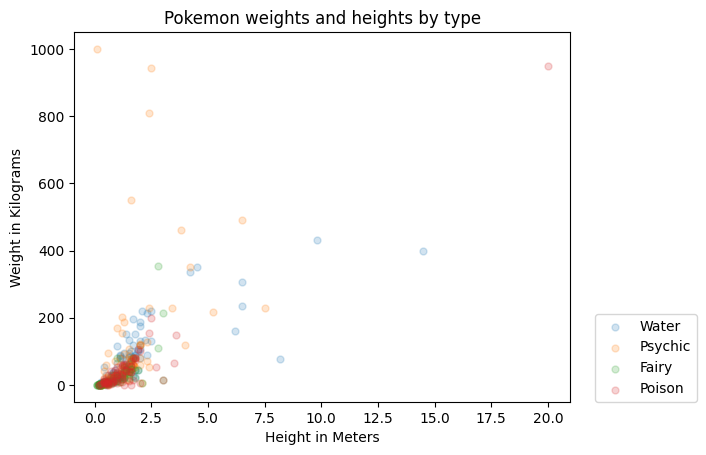

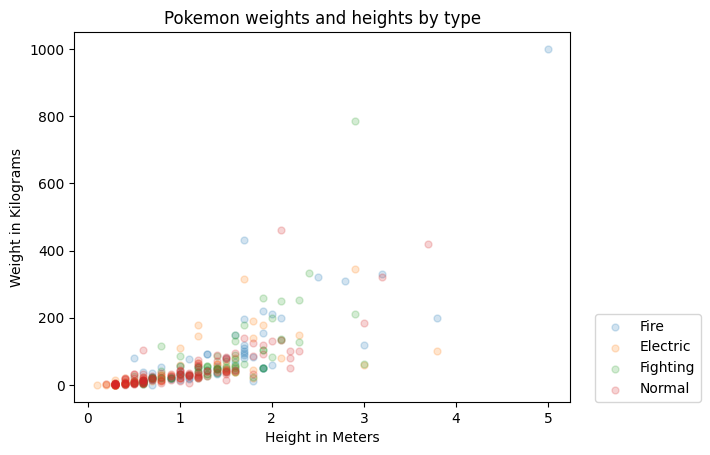

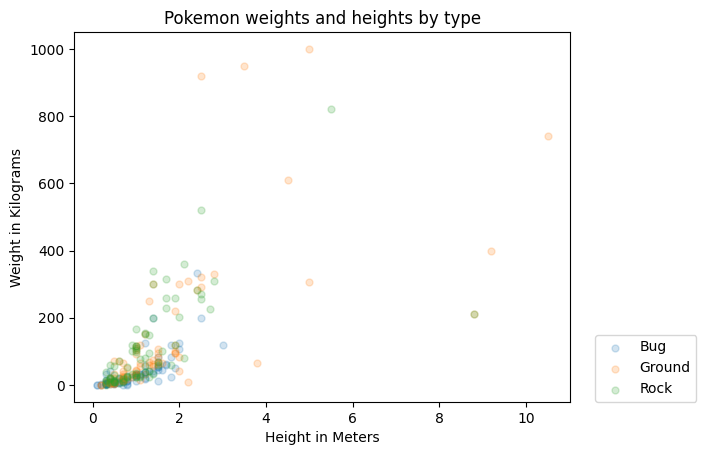

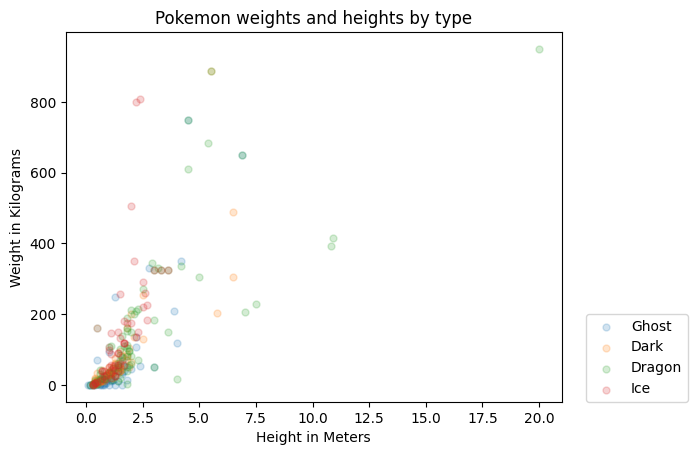

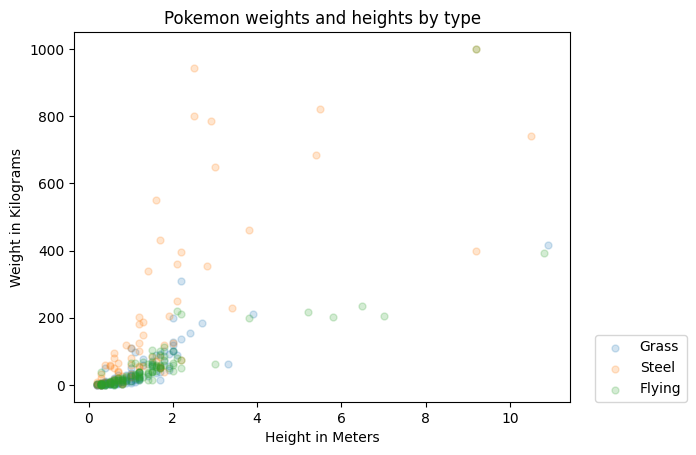

In [ ]:
type_list_1 = [Water, Psychic,  Fairy, Poison]
type_list_2 = [Fire, Electric, Fighting, Normal]
type_list_3 = [Bug, Ground, Rock]
type_list_4 = [Ghost, Dark, Dragon, Ice]
type_list_5 = [Grass, Steel, Flying]

master_list = [type_list_1, type_list_2, type_list_3, type_list_4, type_list_5]

size = 25
ALPHA = 0.2

colorlist = ['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple', 'tab:pink', 'tab:cyan', 'white', 'yellow']

for lists in master_list:
    for types in lists:
        plt.scatter(types['height_m'], types['weight_kg'], label=types.index.name, s= size, alpha=ALPHA)
    plt.legend(loc=(1.05, 0), prop={'size': 10})
    plt.xlabel('Height in Meters')
    plt.ylabel('Weight in Kilograms')
    plt.title('Pokemon weights and heights by type')
    plt.show()

**WHAT ARE THE MOST PREVELENT TYPES**

,Types,Population
0,Water,154
1,Normal,126
2,Psychic,121
3,Grass,119
4,Fire,82
5,Electric,73
6,Fighting,74
7,Ice,57
8,Bug,90
9,Fairy,63


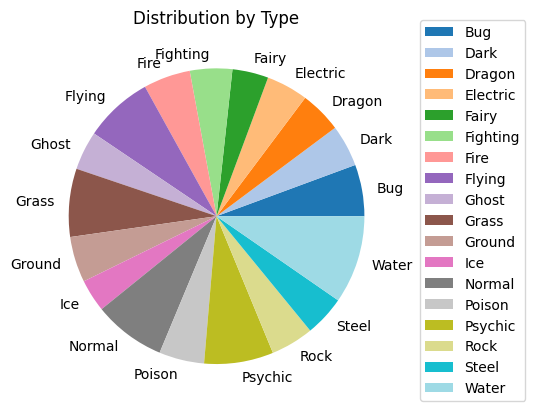

In [ ]:
tf = {}
ty = 0
while ty <= 17:
    tf[f'{all_types[ty]}'] = len(type_list[ty])
    ty = ty + 1
tf = pd.DataFrame(list(tf.items()), columns=['Types', 'Population'])

tf.groupby(['Types']).sum().plot(kind='pie', y ='Population', colormap = colors)
plt.legend(loc=(1.05, 0), prop={'size': 10})
plt.ylabel('')
plt.title('Distribution by Type');
tf

In [ ]:
x = pokedex_imp_alt['egg_type_1'].value_counts()
y = pokedex_imp_alt['egg_type_2'].value_counts()
xt = pd.DataFrame(x)
yt = pd.DataFrame(y)
zt = pd.merge(xt, yt, left_index=True, right_index=True)
zt['number_of_pokemon'] = zt['count_x'] + zt['count_y']
drop = ['count_x', 'count_y']
egg_type_sums = zt.drop(drop, axis=1)
egg_type_sums



,number_of_pokemon
Field,279
Dragon,73
Fairy,70
Mineral,78
Flying,70
Grass,78
Human-Like,73
Monster,98
Water 1,115
Water 2,31


**WHATS THE MOST PREVELENT EGG GROUP?**

,Eggs,Population
0,Field,279
1,Undiscovered,152
2,Bug,90
3,Amorphous,84
4,Mineral,78
5,Flying,70
6,Human-Like,73
7,Grass,78
8,Fairy,70
9,Monster,98


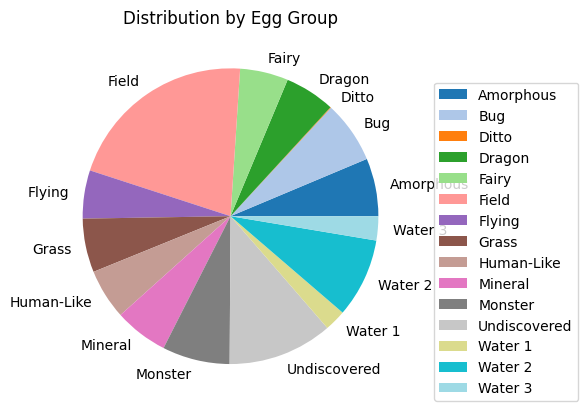

In [ ]:
ef = {}
egg = 0
while egg <= 14:
    ef[f'{all_eggs[egg]}'] = len(egg_list[egg])
    egg = egg + 1
ef = pd.DataFrame(list(ef.items()), columns=['Eggs', 'Population'])

ef.groupby(['Eggs']).sum().plot(kind='pie', y ='Population', colormap = colors)
plt.legend(loc=(1.05, 0), prop={'size': 10})
plt.ylabel('')
plt.title('Distribution by Egg Group');
ef

In [ ]:
pok = import_pokedex()
x = pok['type_1'].value_counts()
y = pok['type_2'].value_counts()
xt = pd.DataFrame(x)
yt = pd.DataFrame(y)
zt = pd.merge(xt, yt, left_index=True, right_index=True)
zt['number_of_pokemon'] = zt['count_x'] + zt['count_y']
drop = ['count_x', 'count_y']
type_sums = zt.drop(drop, axis=1)
type_sums

,number_of_pokemon
Water,154
Normal,126
Grass,119
Bug,90
Psychic,121
Fire,82
Electric,73
Rock,75
Dark,73
Ghost,68
